## Imports

In [2]:
import math
import numpy  as np
import pandas as pd
import inflection
import seaborn as sns


from scipy                 import stats  as ss
from matplotlib            import pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from src.tools import jupyter_settings


## 5.0 DATA PREPARATION

In [3]:
df5 = pd.read_csv('data/df3_tratado.csv')

In [4]:
df5.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 5.1 Rescaling


In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

rs = RobustScaler()
mms = MinMaxScaler()

# competition distance
df5['competition_distance'] = rs.fit_transform(df5[['competition_distance']].values)

# competition time month
df5['competition_time_month'] = rs.fit_transform( df5[['competition_time_month']].values )

# promo time week
df5['promo_time_week'] = mms.fit_transform( df5[['promo_time_week']].values )

# year
df5['year'] = mms.fit_transform( df5[['year']].values )

## 5.2 Transformacao

### 5.2.1 Encoding

In [6]:
# state_holiday - One Hot Encoding
df5 = pd.get_dummies( df5, prefix=['state_holiday'], columns=['state_holiday'] )

# store_type - Label Encoding
le = LabelEncoder()
df5['store_type'] = le.fit_transform( df5['store_type'] )

# assortment - Ordinal Encoding
assortment_dict = {'basic': 1,  'extra': 2, 'extended': 3}
df5['assortment'] = df5['assortment'].map( assortment_dict )

### 5.2.2 Response Variable Transformation

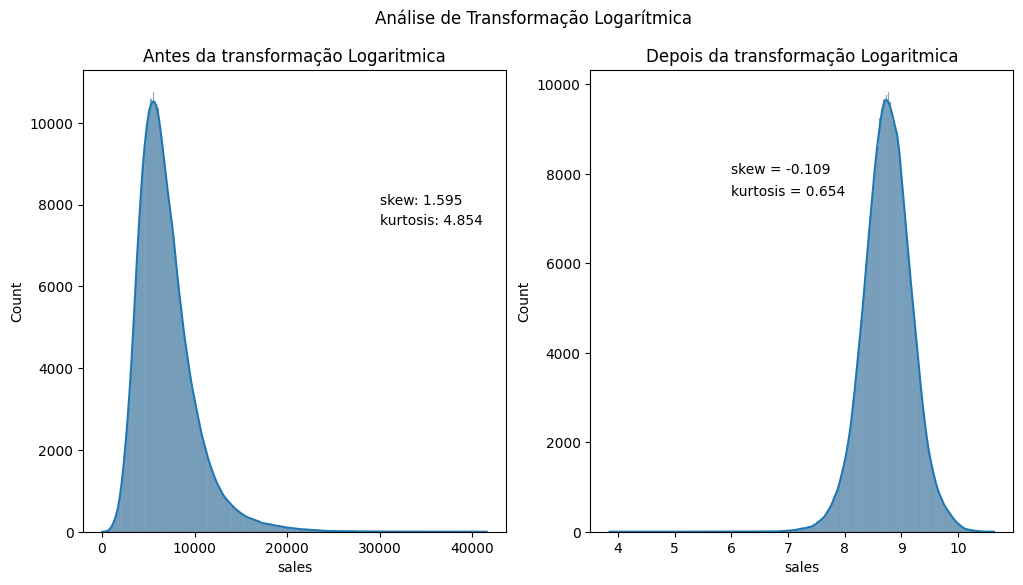

In [7]:
before_skew = df5['sales'].skew()
before_kurtosis = df5['sales'].kurtosis()
fig, (x1,x2) = plt.subplots(1,2, figsize = (12,6))

fig.suptitle('Análise de Transformação Logarítmica')

x1.set_title('Antes da transformação Logaritmica')
sns.histplot(df5['sales'], kde = True, ax= x1)
x1.text(s = 'skew: ' + str(np.round(before_skew, 3)) , x = 30000, y = 8000)
x1.text(s = 'kurtosis: ' + str(np.round(before_kurtosis, 3)) , x = 30000, y = 7500)

x2.set_title('Depois da transformação Logaritmica')
sns.histplot(np.log1p( df5['sales'] ), kde = True, ax = x2)
x2.text(s = 'skew = ' + str(np.round(np.log1p( df5['sales'] ).skew(), 3)) , x = 6, y = 8000)
x2.text(s = 'kurtosis = ' + str(np.round(np.log1p( df5['sales'] ).kurtosis(), 3)) , x = 6, y = 7500)
plt.show()

In [8]:
# Transformação Logaritmica
df5['sales'] = np.log1p(df5['sales'])

### 5.2.3 Nature Transformation

In [9]:
# day of week
df5['day_of_week_sin'] = df5['day_of_week'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
df5['day_of_week_cos'] = df5['day_of_week'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

# month
df5['month_sin'] = df5['month'].apply( lambda x: np.sin( x * ( 2. * np.pi/12 ) ) )
df5['month_cos'] = df5['month'].apply( lambda x: np.cos( x * ( 2. * np.pi/12 ) ) )

# day 
df5['day_sin'] = df5['day'].apply( lambda x: np.sin( x * ( 2. * np.pi/30 ) ) )
df5['day_cos'] = df5['day'].apply( lambda x: np.cos( x * ( 2. * np.pi/30 ) ) )

# week of year
df5['week_of_year_sin'] = df5['week_of_year'].apply( lambda x: np.sin( x * ( 2. * np.pi/52 ) ) )
df5['week_of_year_cos'] = df5['week_of_year'].apply( lambda x: np.cos( x * ( 2. * np.pi/52 ) ) )

In [10]:
# Descrição dos dados após alterações

num_attributes = df5.select_dtypes(include= ['int64', 'float64'])
num_attributes.agg(["mean","median","std","min","max","skew","kurtosis"]).T

,mean,median,std,min,max,skew,kurtosis
store,558.421374,5.580000e+02,321.730861,1.000000,1115.000000,0.000426,-1.198836
day_of_week,3.520350,3.000000e+00,1.723712,1.000000,7.000000,0.019310,-1.259347
sales,8.757737,8.759355e+00,0.425201,3.850148,10.634701,-0.109327,0.653842
promo,0.446356,0.000000e+00,0.497114,0.000000,1.000000,0.215824,-1.953425
school_holiday,0.193578,0.000000e+00,0.395102,0.000000,1.000000,1.551109,0.405939
assortment,1.936493,1.000000e+00,0.993099,1.000000,3.000000,0.127266,-1.973910
competition_distance,0.585779,0.000000e+00,2.030997,-0.372581,31.882258,10.134908,145.288658
competition_open_since_month,6.787355,7.000000e+00,3.309917,1.000000,12.000000,-0.048451,-1.231875
competition_open_since_year,2010.331102,2.012000e+03,5.502628,1900.000000,2015.000000,-7.217323,123.903078
promo2,0.498670,0.000000e+00,0.499999,0.000000,1.000000,0.005320,-1.999976


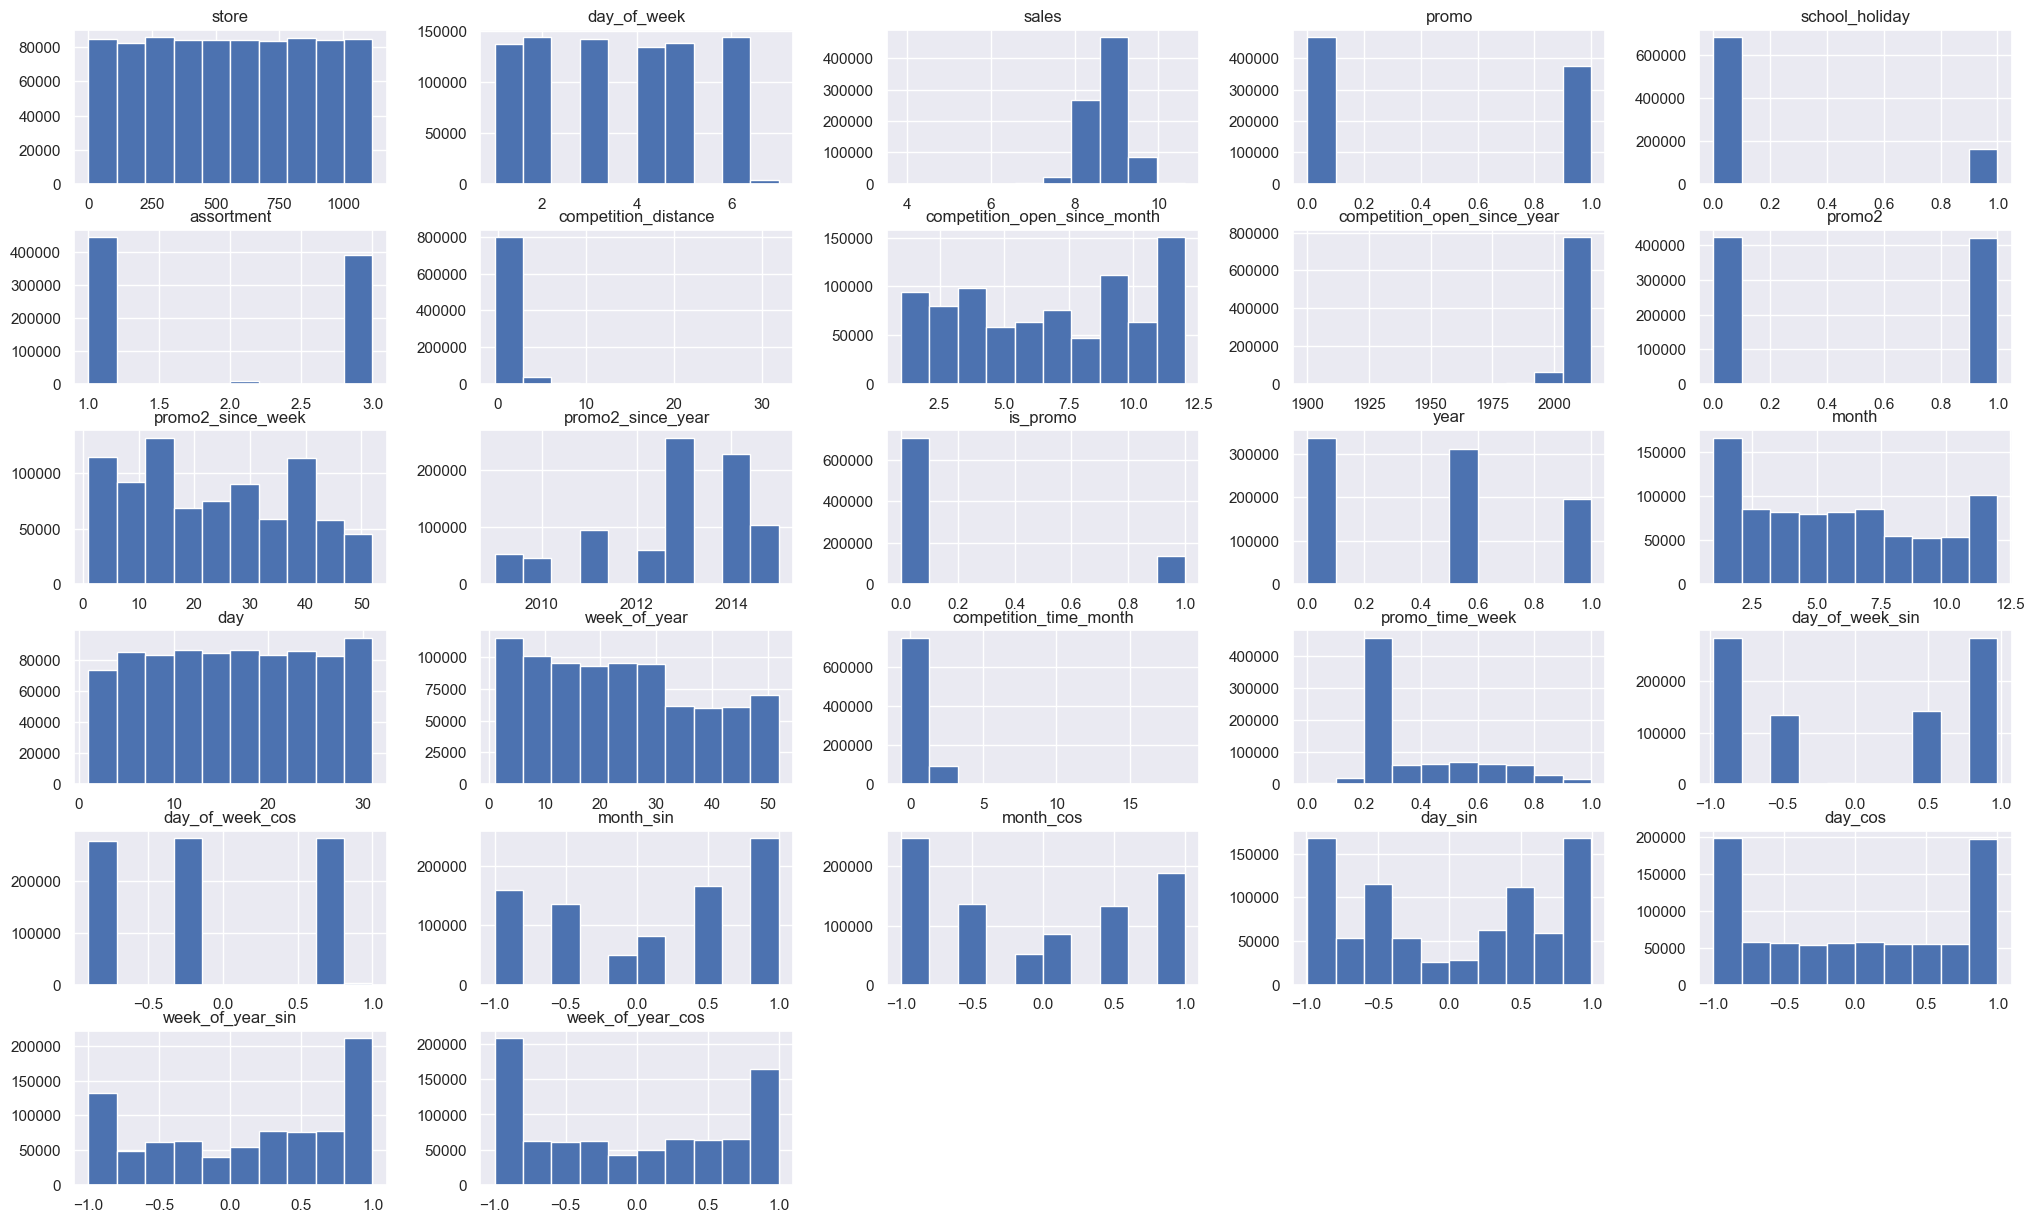

In [11]:
jupyter_settings()
num_attributes.hist(figsize= (25,15))
plt.show()

In [13]:
# Salvar os dados 

df5.to_csv('data/df5_transformado.csv', index= False)